## Random Forest Regression Assignment

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the data Cars93.csv

In [2]:
import pandas as pd
df=pd.read_csv('Cars93.csv')
df.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,NaN,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             56 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

### Check Missing data

In [4]:
s=df.isna().sum()
s[s>0]

AirBags           37
Rear.seat.room     2
Luggage.room      11
dtype: int64

### Check Duplicate data

In [8]:
df.duplicated().sum()

0

### Separate X and Y (Weight)
Weight~Remaining Features

In [10]:
df.columns

Index(['id', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')

In [11]:
X=df.drop(columns=['id','Manufacturer','Weight'])
Y=df[['Weight']]

In [12]:
X.head()

,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Integra,Small,12.9,15.9,18.8,25,31,NaN,Front,4,...,13.2,5,177,102,68,37,26.5,11.0,non-USA,Acura Integra
1,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,...,18.0,5,195,115,71,38,30.0,15.0,non-USA,Acura Legend
2,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,...,16.9,5,180,102,67,37,28.0,14.0,non-USA,Audi 90
3,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,6,...,21.1,6,193,106,70,37,31.0,17.0,non-USA,Audi 100
4,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,...,21.1,4,186,109,69,39,27.0,13.0,non-USA,BMW 535i


In [13]:
Y.head()

,Weight
0,2705
1,3560
2,3375
3,3405
4,3640


### Separate cat and con feature for X


In [14]:
from PM2 import catconsep
cat,con=catconsep(X)

In [15]:
cat

['Model',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin',
 'Make']

In [16]:
con

['Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room']

### Create a preprocessing Pipeline

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [18]:
# Num Pipeline
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                           ('scaler',StandardScaler())])
# Cat Pipeline
cat_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                           ('ohe',OneHotEncoder(handle_unknown='ignore'))])
# Combine both Pipeline
pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)])

In [20]:
# Fit Transform the data
X_pre = pre.fit_transform(X).toarray()
X_pre[0:5]

array([[-0.48578741, -0.37572014, -0.28246529, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.38801699,  1.49784409,  1.53140881, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.00865782,  0.99822696,  0.94805231, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.57194871,  1.89337432,  2.06919057, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.75575171,  1.09190518,  1.30353518, ...,  0.        ,
         0.        ,  0.        ]])

In [21]:
# Column Names
cols = pre.get_feature_names_out()

In [22]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,num__Min.Price,num__Price,num__Max.Price,num__MPG.city,num__MPG.highway,num__EngineSize,num__Horsepower,num__RPM,num__Rev.per.mile,num__Fuel.tank.capacity,...,cat__Make_Toyota Camry,cat__Make_Toyota Celica,cat__Make_Toyota Previa,cat__Make_Toyota Tercel,cat__Make_Volkswagen Corrado,cat__Make_Volkswagen Eurovan,cat__Make_Volkswagen Fox,cat__Make_Volkswagen Passat,cat__Make_Volvo 240,cat__Make_Volvo 850
0,-0.485787,-0.375720,-0.282465,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.388017,1.497844,1.531409,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.008658,0.998227,0.948052,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.755752,1.091905,1.303535,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Train Test Split

In [23]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X_pre,Y,test_size=0.2,random_state=42)

In [24]:
xtrain.shape

(74, 224)

In [25]:
xtest.shape

(19, 224)

## Create a Random forest Regression Model

In [47]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=50,max_depth=4,min_samples_leaf=5,min_samples_split=4,criterion='absolute_error')
model.fit(xtrain,ytrain)


RandomForestRegressor(criterion='absolute_error', max_depth=4,
                      min_samples_leaf=5, min_samples_split=4, n_estimators=50)

In [48]:
# Accuracy Score in training
model.score(xtrain, ytrain)

0.9598225140185016

In [49]:
# Accuracy Score in testing
model.score(xtest, ytest)

0.8665647784762738

### Hyperparameter tuning


In [65]:
params={'n_estimators':[50,100],
        'max_depth':[2,3,4,5,6,7,8,9,10],
        'min_samples_split':[5,6,7,8,9],
        'criterion':['absolute_error','squared_error']}

In [66]:
from sklearn.model_selection import RandomizedSearchCV
rfr=RandomForestRegressor()
rscv=RandomizedSearchCV(rfr,param_distributions=params,cv=5,scoring='neg_root_mean_squared_error')
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['absolute_error',
                                                      'squared_error'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'min_samples_split': [5, 6, 7, 8, 9],
                                        'n_estimators': [50, 100]},
                   scoring='neg_root_mean_squared_error')

In [67]:
rscv.best_params_

{'n_estimators': 100,
 'min_samples_split': 6,
 'max_depth': 4,
 'criterion': 'squared_error'}

In [68]:
rscv.best_score_

-145.7419178978849

In [69]:
best_rfr=rscv.best_estimator_
best_rfr

RandomForestRegressor(max_depth=4, min_samples_split=6)

### Evaluate model accuracy

In [70]:
from PM2 import evaluate_model

In [71]:
evaluate_model(xtrain,ytrain,xtest,ytest,best_rfr)

Training Results :

MSE : 5795.97
RMSE: 76.13
MAE : 57.38
R2  : 0.9832


Testing Results :

MSE : 41561.31
RMSE: 203.87
MAE : 148.07
R2  : 0.8741


### Predict Train and test data

In [72]:
ypred_tr = best_rfr.predict(xtrain)
ypred_ts = best_rfr.predict(xtest)

In [73]:
ypred_tr[0:5]

array([3904.25342216, 3763.00692068, 2947.58307045, 2506.17809735,
       1967.90978175])

In [74]:
ytrain.head()

,Weight
65,4100
15,3715
68,2890
78,2495
30,1845


In [75]:
ypred_ts[0:5]

array([2946.42431601, 2317.39527735, 3764.15387685, 2259.66129509,
       2755.0361425 ])

In [76]:
ytest.head()

,Weight
40,2865
22,2270
55,3735
72,2350
0,2705


### Predicting weight for car sample.csv

In [78]:
xnew = pd.read_csv('sample.csv')
xnew.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,21.1,6,193,106,65,37,31.0,17.0,non-USA,Audi 100
1,Pontiac,Sunbird,Compact,9.4,11.1,12.8,23,31,NaN,Front,...,15.2,5,181,101,66,39,25.0,13.0,USA,Pontiac Sunbird
2,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,NaN,Front,...,16.5,6,198,108,71,40,28.5,16.0,USA,Chevrolet Lumina
3,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,Rear,...,20.0,2,169,96,69,37,NaN,NaN,non-USA,Mazda RX-7
4,Volkswagen,Fox,Small,8.7,9.1,9.5,25,33,NaN,Front,...,12.4,4,163,93,63,34,26.0,10.0,non-USA,Volkswagen Fox


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             56 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

In [83]:
xnew_pre=pre.transform(xnew).toarray()
xnew_pre

array([[ 1.57194871,  1.89337432,  2.06919057, ...,  0.        ,
         0.        ,  0.        ],
       [-0.88813804, -0.87533727, -0.829362  , ...,  0.        ,
         0.        ,  0.        ],
       [-0.42830874, -0.37572014, -0.31892507, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.76737617,  1.35212243,  0.9662822 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.96860817, -1.08351107, -1.1301552 , ...,  0.        ,
         0.        ,  0.        ]])

In [85]:
xnew_pre=pd.DataFrame(xnew_pre,columns=cols)
xnew_pre.head()

,num__Min.Price,num__Price,num__Max.Price,num__MPG.city,num__MPG.highway,num__EngineSize,num__Horsepower,num__RPM,num__Rev.per.mile,num__Fuel.tank.capacity,...,cat__Make_Toyota Camry,cat__Make_Toyota Celica,cat__Make_Toyota Previa,cat__Make_Toyota Tercel,cat__Make_Volkswagen Corrado,cat__Make_Volkswagen Eurovan,cat__Make_Volkswagen Fox,cat__Make_Volkswagen Passat,cat__Make_Volvo 240,cat__Make_Volvo 850
0,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.888138,-0.875337,-0.829362,0.113500,0.360925,-0.647181,-0.649388,-0.135877,0.673908,-0.449005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.428309,-0.375720,-0.318925,-0.244313,-0.016221,-0.453339,-0.649388,-0.135877,0.532158,-0.050439,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.767376,1.352122,0.966282,-0.959938,-0.770514,-1.325626,2.134145,2.054464,-0.014589,1.022624,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.968608,-1.083511,-1.130155,0.471312,0.738071,-0.841022,-1.206095,0.369586,0.441034,-1.307455,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Predicting the results

In [86]:
preds=best_rfr.predict(xnew_pre)
preds

array([3443.11280483, 2581.71268246, 3093.62233721, 2994.30980326,
       2286.93126471])

### Saving preds in Dataframe

In [91]:
df_final=xnew[['Manufacturer']]
df_final

,Manufacturer
0,Audi
1,Pontiac
2,Chevrolet
3,Mazda
4,Volkswagen


In [95]:
df_final['Weight_pred']=preds

In [96]:
df_final

,Manufacturer,Weight_pred
0,Audi,3443.112805
1,Pontiac,2581.712682
2,Chevrolet,3093.622337
3,Mazda,2994.309803
4,Volkswagen,2286.931265


In [92]:
df_final.to_csv('Result.csv')

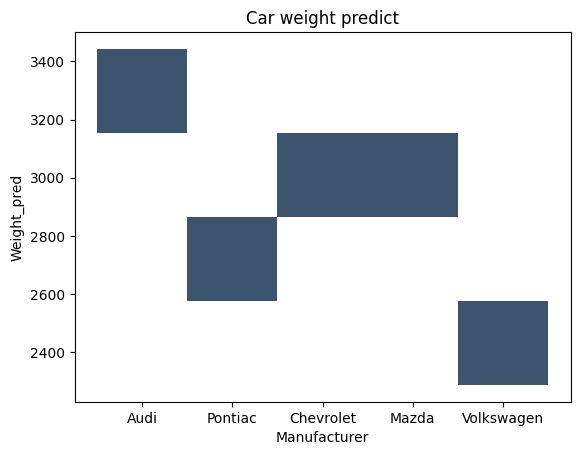

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(data=df_final,x=df_final['Manufacturer'],y=df_final['Weight_pred'])
plt.title('Car weight predict')
plt.show()

<Axes: title={'center': 'Car Weight predict'}, xlabel='Manufacturer'>

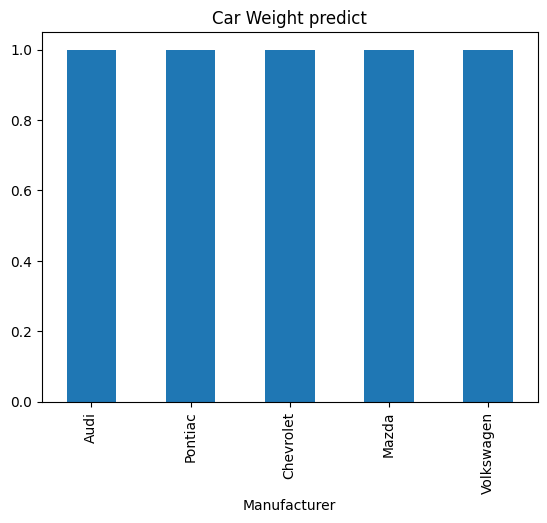

In [101]:
df_final['Manufacturer'].value_counts().plot(kind='bar',title='Car Weight predict')